In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self):
        
        #print("Don't cheat.")
        self.epoch = []
        self.train_loss = []
        self.weights = None

    def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
        self.weights = np.zeros(X.shape[1])
        
        for epoch in range(epochs):

            for batch in range(len(X)//batch_size):
                X_batch =  X[batch*batch_size : (batch+1)*batch_size]
                y_batch =  y[batch*batch_size : (batch+1)*batch_size]
                gradient = np.dot(np.transpose(X_batch), np.dot(X_batch, self.weights) - y_batch)*2/batch_size
                self.weights -= lr * gradient
            self.epoch.append(epoch)
            #if ((epoch % 10000) == 0):
            #    print("epoch ",epoch,": ",self.get_loss(X, y))
            self.train_loss.append(self.get_loss(X, y))

    def get_loss(self, X, y):
        return np.average(np.power(np.dot(X, self.weights) - y, 2))

    def predict(self, X):
        return np.dot(X,self.weights).reshape(-1,1)
                
    def evaluate(self, X, y):
        return self.get_loss(X, y)
        
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        plt.plot(self.epoch, self.train_loss,'b' ,label = "Training loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
        
        #plt.plot(self.epoch[100000:], self.train_loss[100000:],'b' ,label = "Loss")
        #plt.xlabel("Epochs")
        #plt.ylabel("Loss")
        #plt.show()

# Load data & data pre-processing

In [3]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

FileNotFoundError: [Errno 2] No such file or directory: './regression_train.csv'

In [ ]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [ ]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1

# smoker.no -> 0
# smoker.yes -> 1

# region.northeast -> 0
# region.northwest -> 1
# region.southeast -> 2
# region.southwest -> 3
##################################################################


# You may try different label encoding for training your own model
for label in ["sex","smoker","region"] :
    if label == "sex":
        for i in range(df_train.shape[0]):
            if (df_train.at[i, "sex"] == "female"):
                df_train.at[i, "sex"] = 0
            else:
                df_train.at[i, "sex"] = 1
        
        for i in range(df_test.shape[0]):
            if (df_test.at[i, "sex"] == "female"):
                df_test.at[i, "sex"] = 0
            else:
                df_test.at[i, "sex"] = 1
                
        for i in range(df_val.shape[0]):
            if (df_val.at[i, "sex"] == "female"):
                df_val.at[i, "sex"] = 0
            else:
                df_val.at[i, "sex"] = 1
                
    if label == "smoker":
        for i in range(df_train.shape[0]):
            if (df_train.at[i, "smoker"] == "no"):
                df_train.at[i, "smoker"] = 0
            else:
                df_train.at[i, "smoker"] = 1
        
        for i in range(df_test.shape[0]):
            if (df_test.at[i, "smoker"] == "no"):
                df_test.at[i, "smoker"] = 0
            else:
                df_test.at[i, "smoker"] = 1
                
        for i in range(df_val.shape[0]):
            if (df_val.at[i, "smoker"] == "no"):
                df_val.at[i, "smoker"] = 0
            else:
                df_val.at[i, "smoker"] = 1
                
    if label == "region":
        for i in range(df_train.shape[0]):
            if (df_train.at[i, "region"] == "northeast"):
                df_train.at[i, "region"] = 0
            if (df_train.at[i, "region"] == "northwest"):
                df_train.at[i, "region"] = 1
            if (df_train.at[i, "region"] == "southeast"):
                df_train.at[i, "region"] = 2
            if (df_train.at[i, "region"] == "southwest"):
                df_train.at[i, "region"] = 3

        for i in range(df_test.shape[0]):
            if (df_test.at[i, "region"] == "northeast"):
                df_test.at[i, "region"] = 0
            if (df_test.at[i, "region"] == "northwest"):
                df_test.at[i, "region"] = 1
            if (df_test.at[i, "region"] == "southeast"):
                df_test.at[i, "region"] = 2
            if (df_test.at[i, "region"] == "southwest"):
                df_test.at[i, "region"] = 3

        for i in range(df_val.shape[0]):
            if (df_val.at[i, "region"] == "northeast"):
                df_val.at[i, "region"] = 0
            if (df_val.at[i, "region"] == "northwest"):
                df_val.at[i, "region"] = 1
            if (df_val.at[i, "region"] == "southeast"):
                df_val.at[i, "region"] = 2
            if (df_val.at[i, "region"] == "southwest"):
                df_val.at[i, "region"] = 3  

# Single feature (using bmi)

In [ ]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [ ]:
# TODO
# You may convert data to NumPy here 

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

x_train = np.concatenate((x_train, np.ones([x_train.shape[0], 1])), axis = 1).astype(float)
x_test = np.concatenate((x_test, np.ones([x_test.shape[0], 1])), axis = 1).astype(float)
x_val = np.concatenate((x_val, np.ones([x_val.shape[0], 1])), axis = 1).astype(float)

In [ ]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 9
lr = 1.5e-5
epochs = 10000000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

In [ ]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  1382.5127648555201
Weights:  [380.13540619]


In [ ]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  139562065.48344946


In [ ]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  136920281.01301628


In [ ]:
test_pred = linear_reg.predict(x_test)

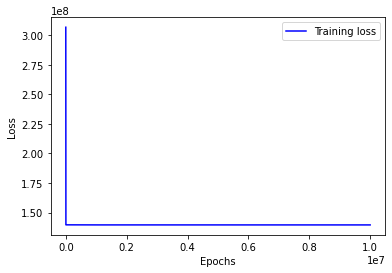

In [ ]:
linear_reg.plot_curve()

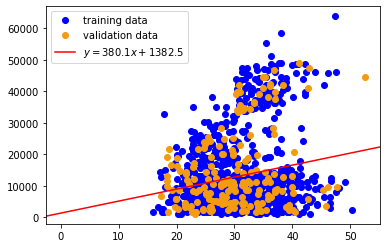

In [ ]:
# Use matplotlib to plot the predicted line with the training and validation samples

# TODO
plt.plot(x_train[:,0], y_train, 'bo',label="training data")
plt.plot(x_val[:,0], y_val, 'o',color='#F39C12',label="validation data")
plt.axline(xy1=(0, linear_reg.weights[-1]), slope=linear_reg.weights[0],color = "red", label=f'$y = {linear_reg.weights[0]:.1f}x {linear_reg.weights[-1]:+.1f}$')
plt.legend()
plt.show()

# Multiple features

In [ ]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [ ]:
# TODO
# You may convert data to NumPy here 
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

x_train = np.concatenate((x_train, np.ones([x_train.shape[0], 1])), axis = 1).astype(float)
x_test = np.concatenate((x_test, np.ones([x_test.shape[0], 1])), axis = 1).astype(float)
x_val = np.concatenate((x_val, np.ones([x_val.shape[0], 1])), axis = 1).astype(float)

In [ ]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 2e-6
epochs = 100000000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

In [ ]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  -11856.917545971966
Weights:  [  259.85021055  -383.55425656   333.3293558    442.5551735
 24032.2152028   -416.01707014]


In [ ]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  34697170.25408136


In [ ]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  41958555.63310554


In [ ]:
test_pred = linear_reg.predict(x_test)

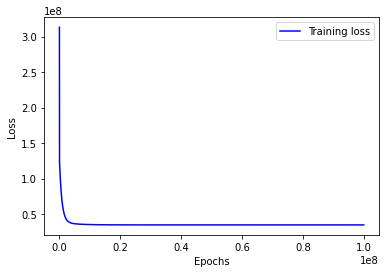

In [ ]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

In [ ]:
# Load data
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

# Label encoding
    # sex.female -> -1
    # sex.male -> 1
for label in ["sex","smoker","region"] :
    if label == "sex":
        for i in range(df_train.shape[0]):
            if (df_train.at[i, "sex"] == "female"):
                df_train.at[i, "sex"] = -1
            else:
                df_train.at[i, "sex"] = 1
        
        for i in range(df_test.shape[0]):
            if (df_test.at[i, "sex"] == "female"):
                df_test.at[i, "sex"] = -1
            else:
                df_test.at[i, "sex"] = 1
                
        for i in range(df_val.shape[0]):
            if (df_val.at[i, "sex"] == "female"):
                df_val.at[i, "sex"] = -1
            else:
                df_val.at[i, "sex"] = 1
    # smoker.no -> -1
    # smoker.yes -> 1                
    if label == "smoker":
        for i in range(df_train.shape[0]):
            if (df_train.at[i, "smoker"] == "no"):
                df_train.at[i, "smoker"] = -1
            else:
                df_train.at[i, "smoker"] = 1
        
        for i in range(df_test.shape[0]):
            if (df_test.at[i, "smoker"] == "no"):
                df_test.at[i, "smoker"] = -1
            else:
                df_test.at[i, "smoker"] = 1
                
        for i in range(df_val.shape[0]):
            if (df_val.at[i, "smoker"] == "no"):
                df_val.at[i, "smoker"] = -1
            else:
                df_val.at[i, "smoker"] = 1
                
    #One hot vector
    #northeast -> [-1,1,1,1] 
    #northwest -> [1,-1,1,1]
    #southeast -> [1,1,-1,1]
    #southwest -> [1,1,1,-1]
    if label == "region":
        np_one_hot_train = np.ones((df_train.shape[0],4))
        np_one_hot_test = np.ones((df_test.shape[0],4))
        np_one_hot_val = np.ones((df_val.shape[0],4))
        
        for i in range(df_train.shape[0]):
            if (df_train.at[i, "region"] == "northeast"):
                np_one_hot_train[i][0] = -1
            if (df_train.at[i, "region"] == "northwest"):
                np_one_hot_train[i][1] = -1
            if (df_train.at[i, "region"] == "southeast"):
                np_one_hot_train[i][2] = -1
            if (df_train.at[i, "region"] == "southwest"):
                np_one_hot_train[i][3] = -1
        
        one_hot_train = pd.DataFrame(np_one_hot_train)
        one_hot_train.columns = ["northeast","northwest","southeast","southwest"]
        df_train = df_train.drop(['region'], axis=1)
        df_train = df_train.join(one_hot_train)
        
        for i in range(df_test.shape[0]):
            if (df_test.at[i, "region"] == "northeast"):
                np_one_hot_test[i][0] = -1
            if (df_test.at[i, "region"] == "northwest"):
                np_one_hot_test[i][1] = -1
            if (df_test.at[i, "region"] == "southeast"):
                np_one_hot_test[i][2] = -1
            if (df_test.at[i, "region"] == "southwest"):
                np_one_hot_test[i][3] = -1
                
        one_hot_test = pd.DataFrame(np_one_hot_test)
        one_hot_test.columns = ["northeast","northwest","southeast","southwest"]
        df_test = df_test.drop(['region'], axis=1)
        df_test = df_test.join(one_hot_test)

        for i in range(df_val.shape[0]):
            if (df_val.at[i, "region"] == "northeast"):
                np_one_hot_val[i][0] = -1
            if (df_val.at[i, "region"] == "northwest"):
                np_one_hot_val[i][1] = -1
            if (df_val.at[i, "region"] == "southeast"):
                np_one_hot_val[i][2] = -1
            if (df_val.at[i, "region"] == "southwest"):
                np_one_hot_val[i][3] = -1
        
        one_hot_val = pd.DataFrame(np_one_hot_val)
        one_hot_val.columns = ["northeast","northwest","southeast","southwest"]
        df_val = df_val.drop(['region'], axis=1)
        df_val = df_val.join(one_hot_val)
        
    #sort the column
df_train =  df_train[['age','sex','bmi','children','smoker','northeast','northwest','southeast','southwest','charges']]
df_test =  df_test[['age','sex','bmi','children','smoker','northeast','northwest','southeast','southwest','charges']]
df_val =  df_val[['age','sex','bmi','children','smoker','northeast','northwest','southeast','southwest','charges']]    
    
    #Multiply 2~3 feature(except charge) to get some new feature.
        #Multiply 2 numbers
two_mul_index = np.array([[2,4],[0,4],[3,4],[4,6],[4,5],[0,2]])
for i,j in two_mul_index:
    df_train[str(i)+","+str(j)] = np.nan
    df_train[str(i)+","+str(j)] = df_train.iloc[:,i] * df_train.iloc[:, j]
    df_val[str(i)+","+str(j)] = np.nan
    df_val[str(i)+","+str(j)] = df_val.iloc[:,i] * df_val.iloc[:, j]
    df_test[str(i)+","+str(j)] = np.nan
    df_test[str(i)+","+str(j)] = df_test.iloc[:,i] * df_test.iloc[:, j]

        #Multiply 3 numbers
three_mul_index = np.array([[4,8,8],[4,5,5],[4,7,7],[4,6,6],[1,1,4],[4,4,4],[2,2,4],[0,2,4],[0,0,4],[2,3,4],[2,4,6],[2,4,5],[0,3,4],[2,4,8]])
for i,j,k in three_mul_index:
    df_train[str(i)+","+str(j)+","+str(k)] = np.nan
    df_train[str(i)+","+str(j)+","+str(k)] = df_train.iloc[:,i] * df_train.iloc[:, j] * df_train.iloc[:, k]
    df_val[str(i)+","+str(j)+","+str(k)] = np.nan
    df_val[str(i)+","+str(j)+","+str(k)] = df_val.iloc[:,i] * df_val.iloc[:, j] * df_val.iloc[:, k]
    df_test[str(i)+","+str(j)+","+str(k)] = np.nan
    df_test[str(i)+","+str(j)+","+str(k)] = df_test.iloc[:,i] * df_test.iloc[:, j] * df_test.iloc[:, k]
#get dataset
x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

#transform to numpy
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

x_train = np.concatenate((x_train, np.ones([x_train.shape[0], 1])), axis = 1).astype(float)
x_test = np.concatenate((x_test, np.ones([x_test.shape[0], 1])), axis = 1).astype(float)
x_val = np.concatenate((x_val, np.ones([x_val.shape[0], 1])), axis = 1).astype(float)

#training
batch_size = x_train.shape[0]
lr = 2e-8
epochs = 3000000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

#evaluation
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])
print('training loss: ', linear_reg.evaluate(x_train, y_train))
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

#prediction
test_pred = linear_reg.predict(x_test)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, 1)

Intercepts:  5.623406621178636
Weights:  [-3.60739144e+01 -2.62080394e+01  3.22197797e+02  4.73190858e+01
  3.67542050e+00 -3.15045678e+01  3.67458837e+00  2.34250678e+01
  1.56517249e+01  7.37520299e+01  4.17712007e+01  1.54129190e+00
 -8.55432431e-01 -1.62487405e+00  9.65392040e+00  3.67542050e+00
  3.67542050e+00  3.67542050e+00  3.67542050e+00  3.67542050e+00
  3.67542050e+00  6.23069544e+00  7.16160455e+00 -3.41521247e+00
 -1.48083957e+01 -6.91039774e+00  2.04183190e-01  9.83472535e-02
 -1.40927927e+01]
training loss:  21885413.112560567
validation loss:  27462889.769601174
test_pred shape:  (200, 1)


# Output the csv file

In [ ]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("sample_output.csv")